In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score
from tqdm import tqdm

# Load the dataset
file_path = '../The_Moshkov_Files/CP_count_PUMA.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

# List of assay columns to process (assuming all columns except INCHIKEY and the last 13 columns are assays)
assay_columns = data.columns[1:-13]

# Initialize a list to store results
results = []

# Define a function to calculate a probability score based on the distance from the threshold
def calculate_probability_score(value, threshold):
    return 1 / (1 + np.exp(value - threshold))

# Define threshold range based on the dataset
min_value = data['Cells_Number_Object_Number'].min()
max_value = data['Cells_Number_Object_Number'].max()
thresholds = np.arange(min_value, max_value, 1)

# Process each assay and each threshold
for assay in tqdm(assay_columns):
    # Drop rows with NaNs or -1s in the current assay column or in Cells_Number_Object_Number
    valid_data = data[(data[assay] != -1) & (data[assay].notna())].copy().reset_index(drop=True)

    # Process for each threshold
    for threshold in thresholds:
    
        # Calculate the probability score
        valid_data.loc[:, 'Probability_Score'] = valid_data['Cells_Number_Object_Number'].apply(calculate_probability_score, threshold=threshold)
        # print(valid_data[['Probability_Score']])
        # True values for the assay
        true_values = valid_data[assay] == 1
        predicted_probs = valid_data['Probability_Score']
        predicted_values = valid_data['Probability_Score'] >= 0.5

        # Calculate TP, FP, TN, FN
        TP = np.sum((predicted_values == 1) & (true_values == 1))
        FP = np.sum((predicted_values == 1) & (true_values == 0))
        TN = np.sum((predicted_values == 0) & (true_values == 0))
        FN = np.sum((predicted_values == 0) & (true_values == 1))

        # Calculate metrics
        accuracy = accuracy_score(true_values, predicted_values)
        balanced_accuracy = balanced_accuracy_score(true_values, predicted_values)
        recall = recall_score(true_values, predicted_values, zero_division=0)
        precision = precision_score(true_values, predicted_values, zero_division=0)
        auc = roc_auc_score(true_values, predicted_probs)
        # print(auc)

        # Append the result
        results.append({
            'Assay': assay,
            'Accuracy': accuracy,
            'Balanced Accuracy': balanced_accuracy,
            'Recall': recall,
            'Precision': precision,
            'Threshold': threshold,
            'AUC': auc,
            'TP': TP,
            'FP': FP,
            'TN': TN,
            'FN': FN
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('assay_auc_by_threshold_with_confusion_Moshkov.csv', index=False)


100%|██████████| 270/270 [03:35<00:00,  1.25it/s]


In [2]:
results_df = pd.read_csv('assay_auc_by_threshold_with_confusion_Moshkov.csv')


results_df[results_df["Assay"]=='1_1']

,Assay,Accuracy,Balanced Accuracy,Recall,Precision,Threshold,AUC,TP,FP,TN,FN
0,1_1,0.98,0.500000,0.0,0.00,-50.46875,0.806122,0,0,98,2
1,1_1,0.97,0.494898,0.0,0.00,-49.46875,0.806122,0,1,97,2
2,1_1,0.97,0.494898,0.0,0.00,-48.46875,0.806122,0,1,97,2
3,1_1,0.97,0.494898,0.0,0.00,-47.46875,0.806122,0,1,97,2
4,1_1,0.97,0.494898,0.0,0.00,-46.46875,0.806122,0,1,97,2
...,...,...,...,...,...,...,...,...,...,...,...
69,1_1,0.02,0.500000,1.0,0.02,18.53125,0.839286,2,98,0,0
70,1_1,0.02,0.500000,1.0,0.02,19.53125,0.836735,2,98,0,0
71,1_1,0.02,0.500000,1.0,0.02,20.53125,0.836735,2,98,0,0
72,1_1,0.02,0.500000,1.0,0.02,21.53125,0.887755,2,98,0,0


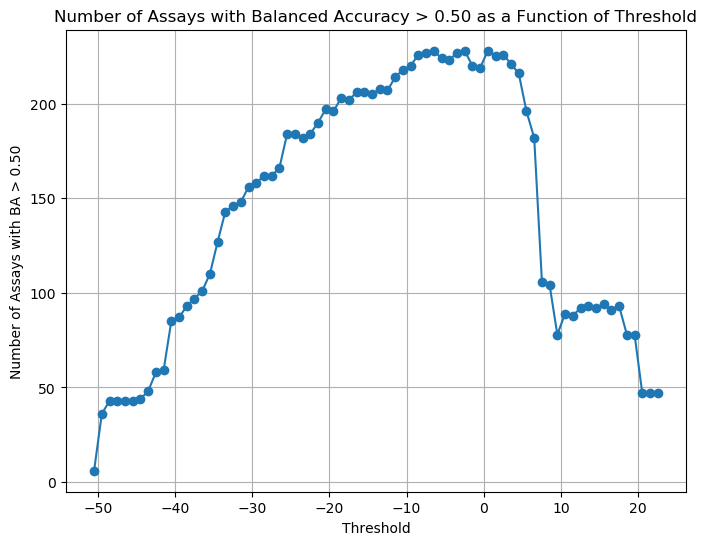

In [3]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['Balanced Accuracy'] > 0.50).sum()).reset_index(name='Assays with BA > 0.50')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with BA > 0.50'], marker='o', linestyle='-')
plt.title('Number of Assays with Balanced Accuracy > 0.50 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with BA > 0.50')
plt.grid(True)
plt.show()

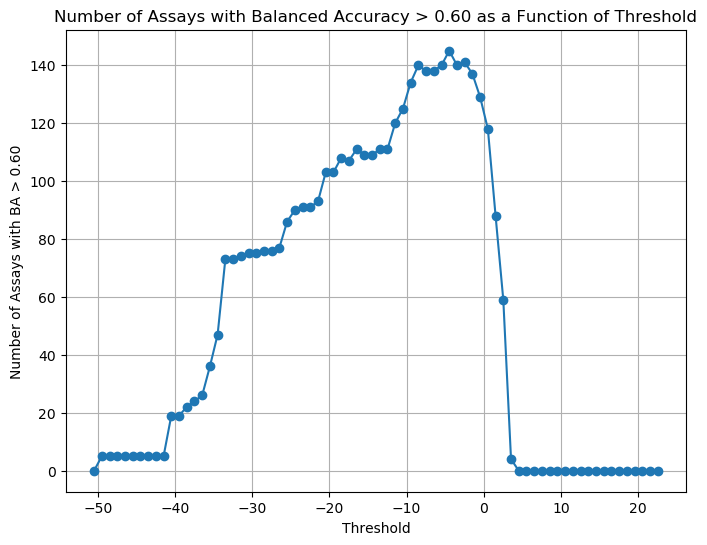

In [4]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['Balanced Accuracy'] > 0.60).sum()).reset_index(name='Assays with BA > 0.50')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with BA > 0.50'], marker='o', linestyle='-')
plt.title('Number of Assays with Balanced Accuracy > 0.60 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with BA > 0.60')
plt.grid(True)
plt.show()


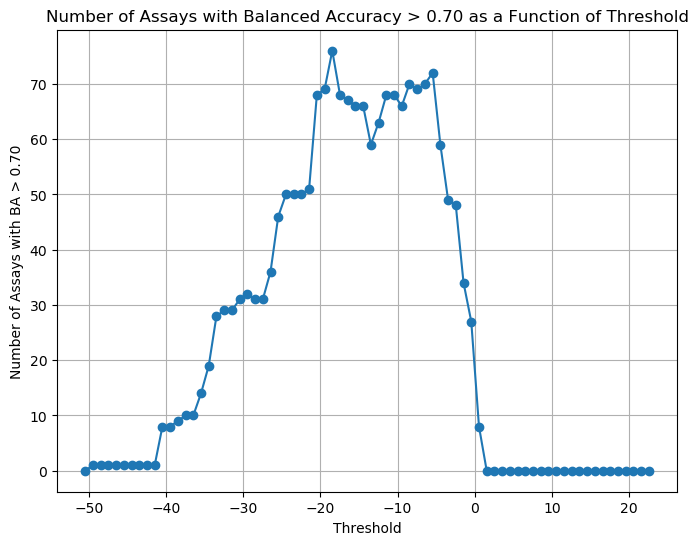

In [5]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['Balanced Accuracy'] > 0.70).sum()).reset_index(name='Assays with BA > 0.70')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with BA > 0.70'], marker='o', linestyle='-')
plt.title('Number of Assays with Balanced Accuracy > 0.70 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with BA > 0.70')
plt.grid(True)
plt.show()


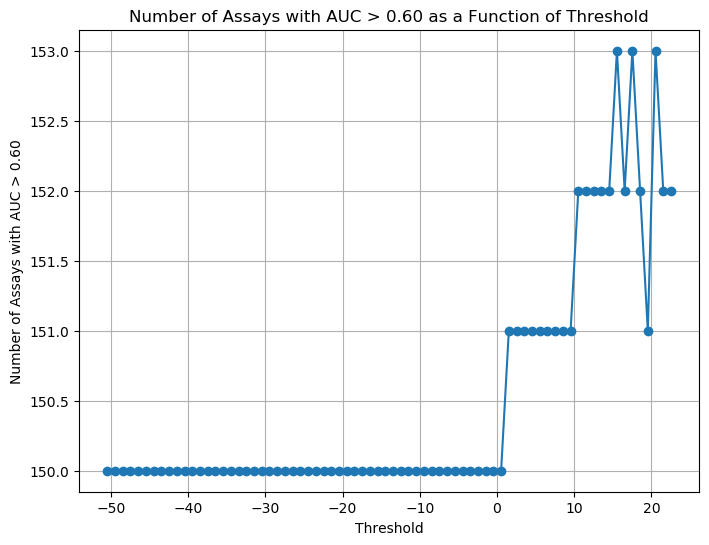

In [6]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['AUC'] > 0.60).sum()).reset_index(name='Assays with AUC>')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with AUC>'], marker='o', linestyle='-')
plt.title('Number of Assays with AUC > 0.60 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with AUC > 0.60')
plt.grid(True)
plt.show()


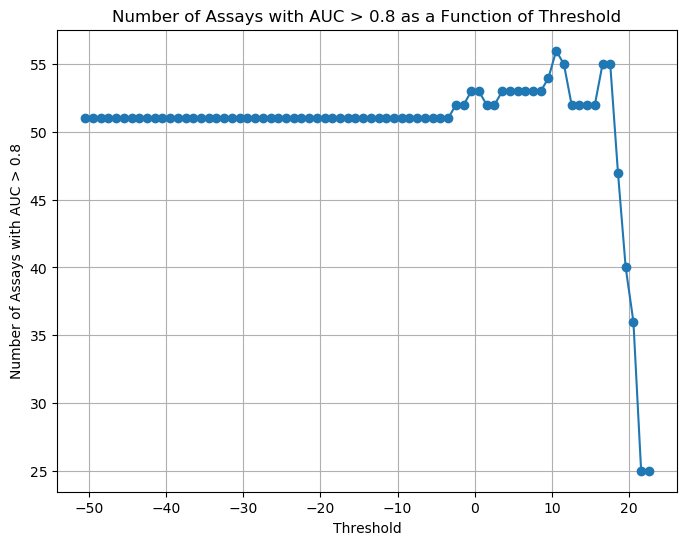

In [7]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['AUC'] > 0.8).sum()).reset_index(name='Assays with AUC>')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with AUC>'], marker='o', linestyle='-')
plt.title('Number of Assays with AUC > 0.8 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with AUC > 0.8')
plt.grid(True)
plt.show()


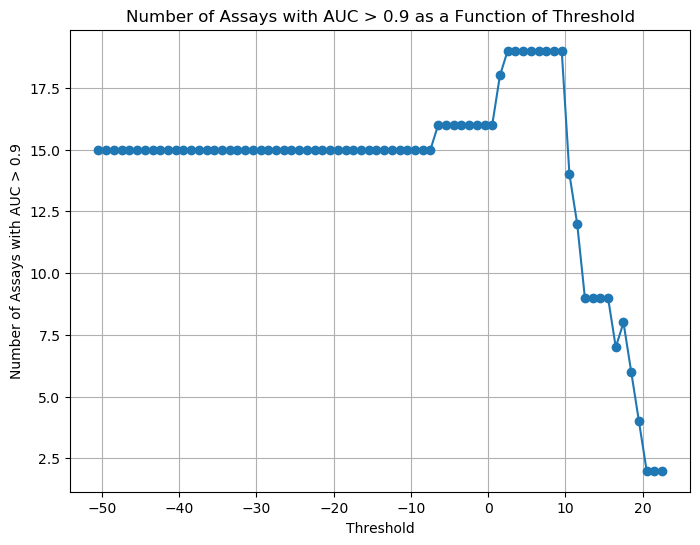

In [8]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['AUC'] > 0.9).sum()).reset_index(name='Assays with AUC>')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with AUC>'], marker='o', linestyle='-')
plt.title('Number of Assays with AUC > 0.9 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with AUC > 0.9')
plt.grid(True)
plt.show()


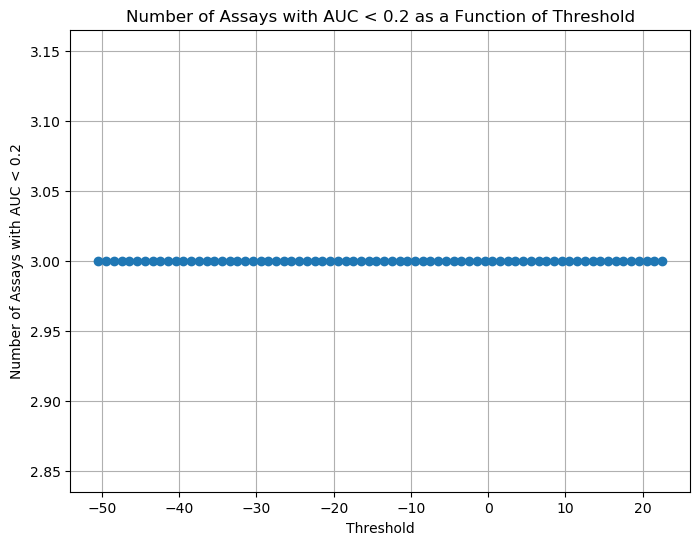

In [9]:
# Group by threshold and count how many assays have balanced accuracy > 0.50 at each threshold
threshold_counts = results_df.groupby('Threshold').apply(lambda x: (x['AUC'] < 0.2).sum()).reset_index(name='Assays with AUC<')

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(threshold_counts['Threshold'], threshold_counts['Assays with AUC<'], marker='o', linestyle='-')
plt.title('Number of Assays with AUC < 0.2 as a Function of Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Assays with AUC < 0.2')
plt.grid(True)
plt.show()

/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


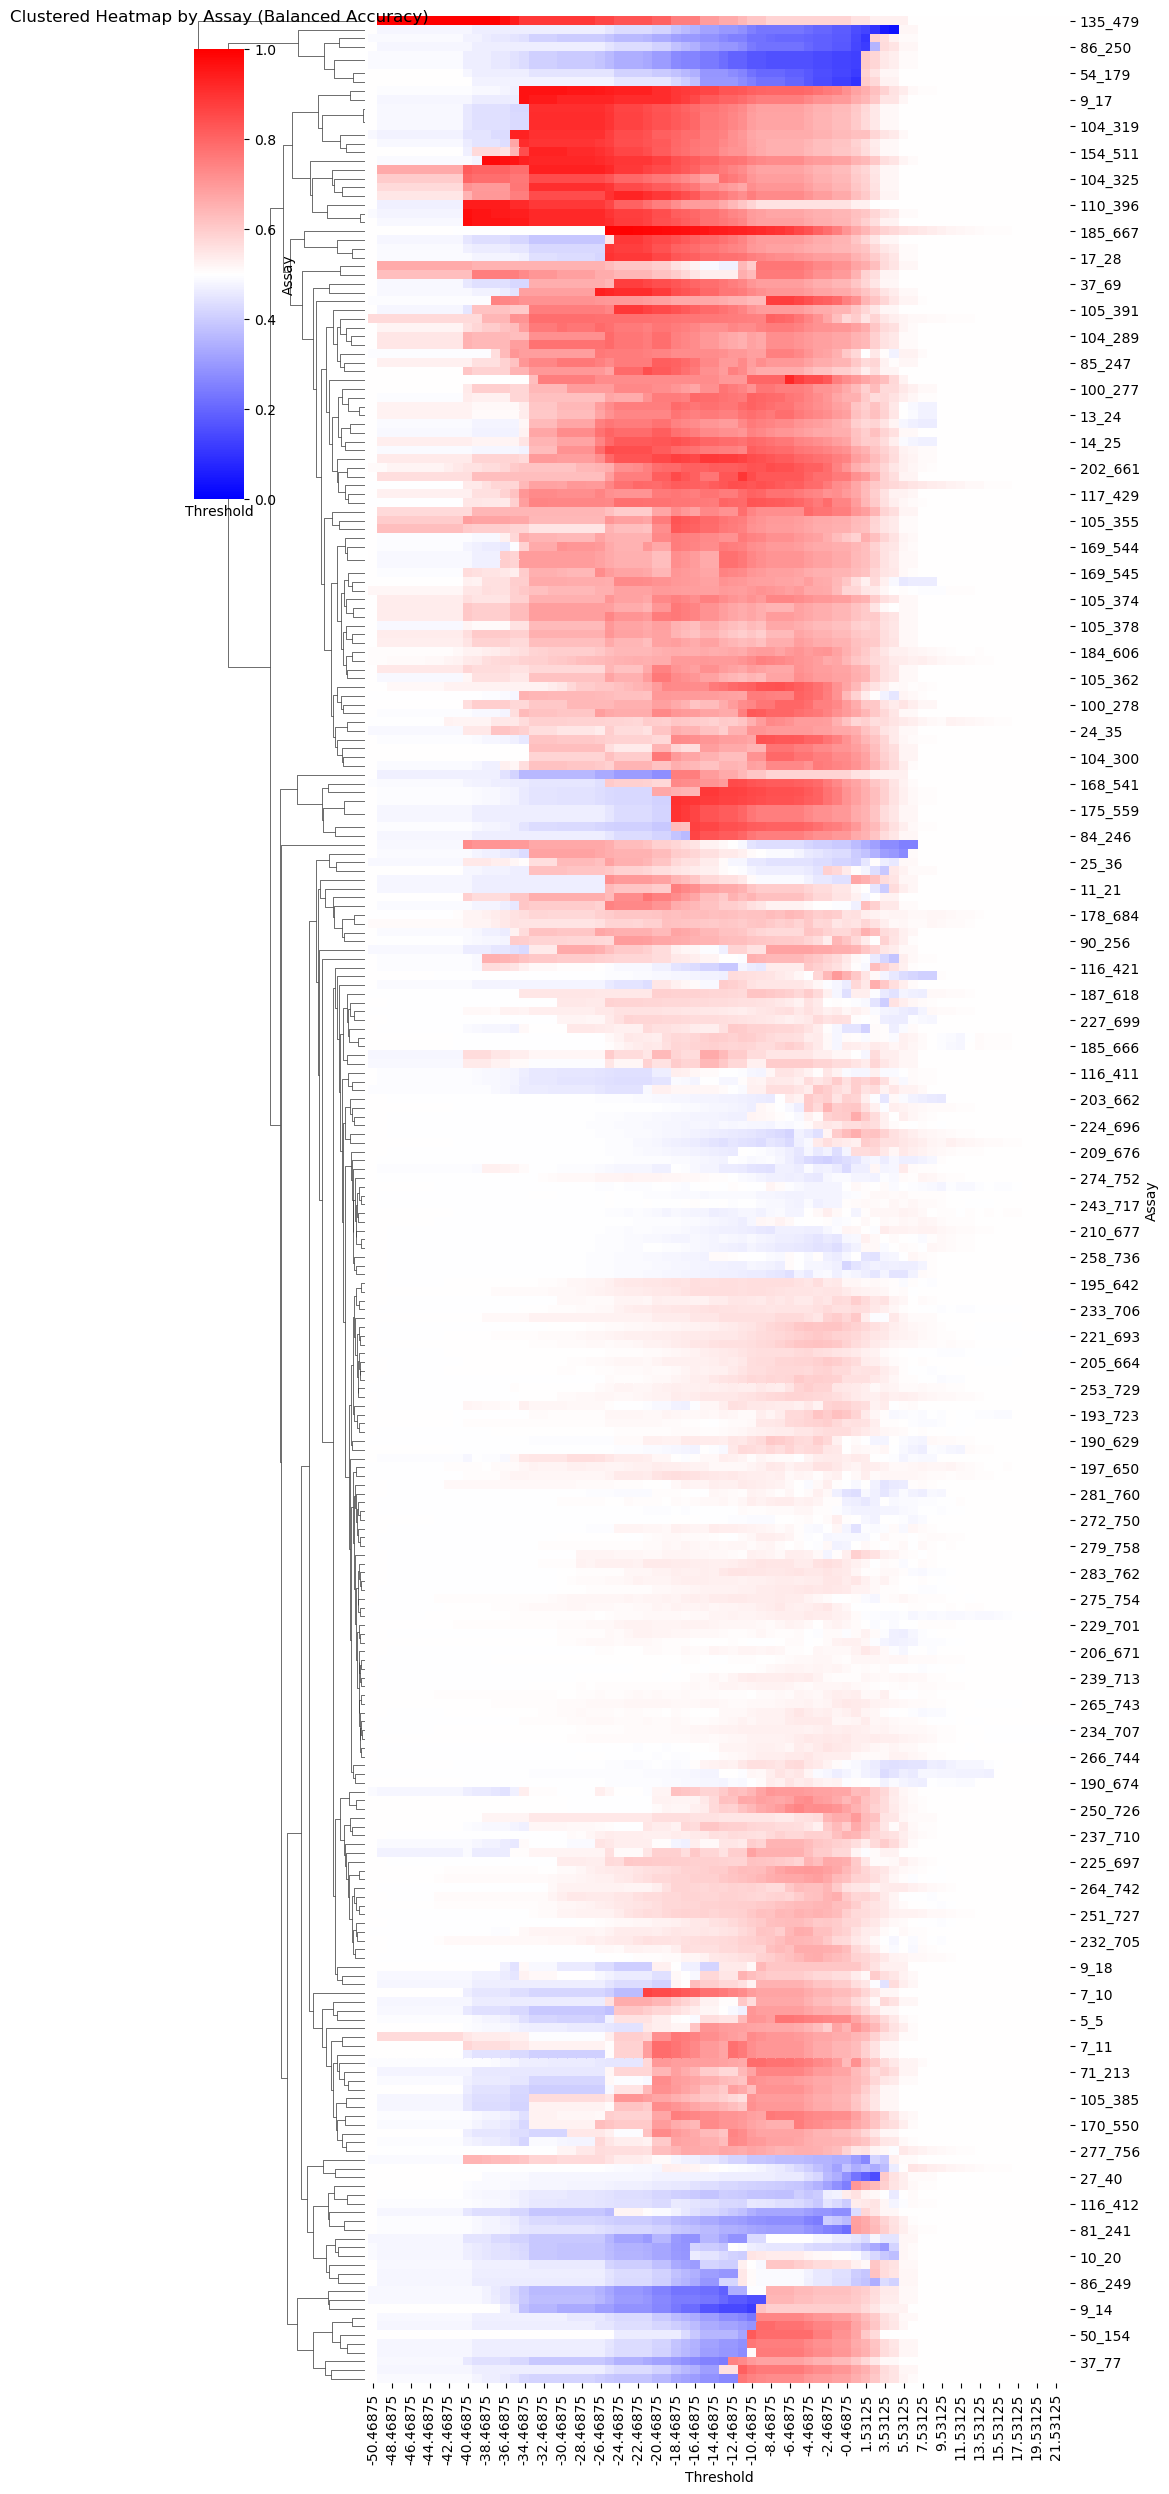

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'blue'), (0.5, 'white'), (1, 'red')])

# Create a pivot table for the heatmap, with 'Assay' as rows, 'Threshold' as columns, and 'Balanced Accuracy' as values
heatmap_data = results_df.pivot(index='Assay', columns='Threshold', values='Balanced Accuracy')

# Plot the clustered heatmap with clustering only by Assay (rows)
sns.clustermap(heatmap_data, cmap=custom_cmap, cbar=True, figsize=(10, 25), 
               row_cluster=True, col_cluster=False, dendrogram_ratio=(0.2, 0), method='average',
               center=0.5, vmin=0, vmax=1)

plt.title('Clustered Heatmap by Assay (Balanced Accuracy)', pad=20)
plt.xlabel('Threshold')
plt.ylabel('Assay')
plt.show()


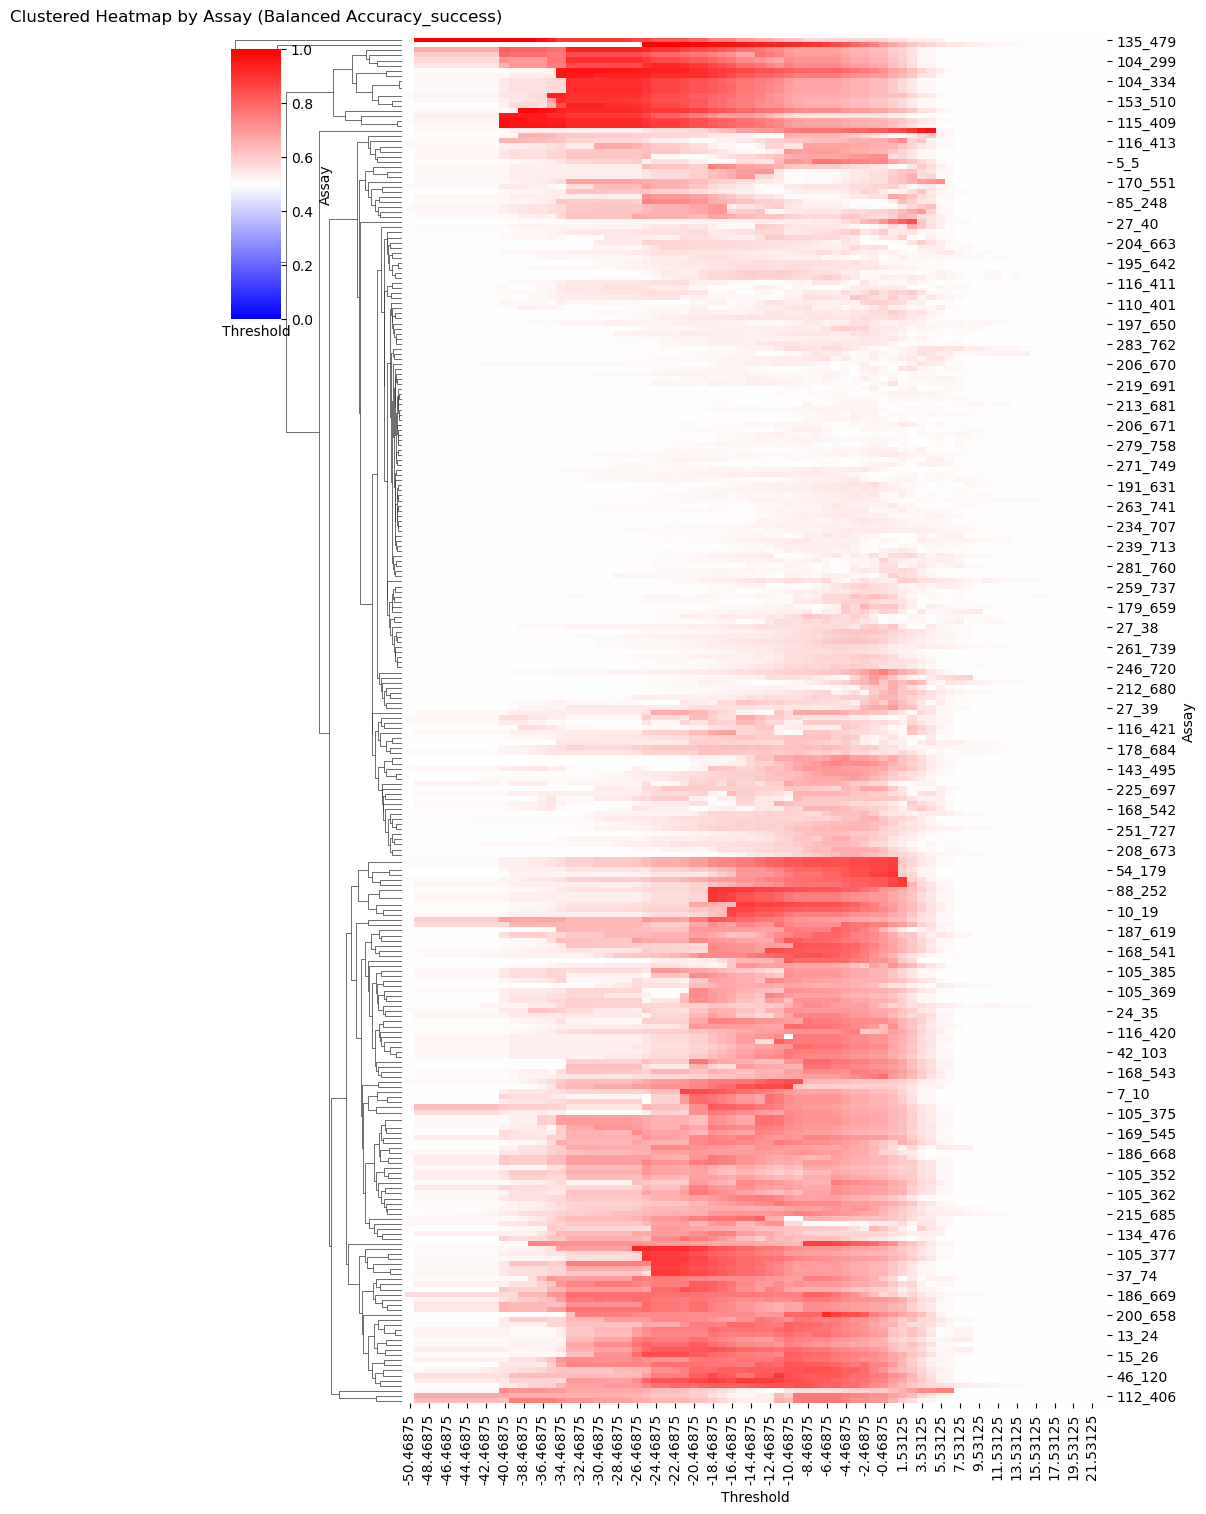

In [11]:
results_df["Balanced Accuracy_success"] = results_df["Balanced Accuracy"].apply(lambda x: 1 - x if x < 0.5 else x)
results_df["AUC_success"] = results_df["AUC"].apply(lambda x: 1 - x if x < 0.5 else x)


custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'blue'), (0.5, 'white'), (1, 'red')])

# Create a pivot table for the heatmap, with 'Assay' as rows, 'Threshold' as columns, and 'Balanced Accuracy' as values
heatmap_data = results_df.pivot(index='Assay', columns='Threshold', values='Balanced Accuracy_success')

# Plot the clustered heatmap with clustering only by Assay (rows)
sns.clustermap(heatmap_data, cmap=custom_cmap, cbar=True, figsize=(10, 15), 
               row_cluster=True, col_cluster=False, dendrogram_ratio=(0.2, 0), method='average',
               center=0.5, vmin=0, vmax=1)

plt.title('Clustered Heatmap by Assay (Balanced Accuracy_success)', pad=20)
plt.xlabel('Threshold')
plt.ylabel('Assay')
plt.show()


In [13]:
results_df

,Assay,Accuracy,Balanced Accuracy,Recall,Precision,Threshold,AUC,TP,FP,TN,FN,Balanced Accuracy_success,AUC_success
0,1_1,0.980000,0.500000,0.0,0.000000,-50.46875,0.806122,0,0,98,2,0.500000,0.806122
1,1_1,0.970000,0.494898,0.0,0.000000,-49.46875,0.806122,0,1,97,2,0.505102,0.806122
2,1_1,0.970000,0.494898,0.0,0.000000,-48.46875,0.806122,0,1,97,2,0.505102,0.806122
3,1_1,0.970000,0.494898,0.0,0.000000,-47.46875,0.806122,0,1,97,2,0.505102,0.806122
4,1_1,0.970000,0.494898,0.0,0.000000,-46.46875,0.806122,0,1,97,2,0.505102,0.806122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,93_259,0.267717,0.500000,1.0,0.267717,18.53125,0.530835,34,93,0,0,0.500000,0.530835
19976,93_259,0.267717,0.500000,1.0,0.267717,19.53125,0.529570,34,93,0,0,0.500000,0.529570
19977,93_259,0.267717,0.500000,1.0,0.267717,20.53125,0.532100,34,93,0,0,0.500000,0.532100
19978,93_259,0.267717,0.500000,1.0,0.267717,21.53125,0.534156,34,93,0,0,0.500000,0.534156


In [20]:
results_df.Assay.nunique()

270

In [21]:
# Define the threshold percentage (e.g., 70%) for "most" of the thresholds
threshold_percentage = 0.4

# Group by Assay and check if more than 70% of the 'Balanced Accuracy_success' values are > 0.5
assays_with_most_ba_success = results_df.groupby('Assay').filter(lambda x: (x['Balanced Accuracy_success'] > 0.6).mean() > threshold_percentage)

# Extract the list of assays
assay_list_most = assays_with_most_ba_success['Assay'].unique()

# Display the list of assays
assay_list_most

array(['100_277', '100_278', '104_291', '105_355', '105_361', '105_378',
       '105_352', '104_289', '104_325', '104_297', '104_295', '104_299',
       '104_319', '104_323', '104_334', '105_339', '105_341', '105_362',
       '105_374', '105_382', '105_391', '110_396', '111_402', '112_406',
       '113_407', '115_409', '117_429', '117_430', '118_432', '12_23',
       '13_24', '133_474', '135_479', '14_25', '15_26', '153_510',
       '154_511', '16_27', '167_539', '167_538', '168_543', '169_544',
       '169_545', '169_549', '170_550', '178_591', '18_29', '181_599',
       '181_600', '186_668', '186_669', '187_619', '19_30', '192_635',
       '200_658', '201_660', '202_661', '21_32', '215_685', '254_730',
       '26_37', '275_753', '29_43', '3_3', '37_69', '37_74', '37_77',
       '46_120', '6_7', '82_242', '82_243', '83_244', '85_247', '9_17',
       '91_257', '92_258'], dtype=object)

In [22]:
len(assay_list_most)

76

In [23]:
76/270

0.2814814814814815